In [1]:
import numpy as np 
import pandas as pd 
import os

In [2]:
import matplotlib.pyplot as plt
import cv2

from keras.utils import to_categorical
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout
from keras.models import Sequential

from sklearn.model_selection import train_test_split

np.random.seed(1)

In [5]:
train_images = []
train_labels = []
shape = (200, 200)
train_path = 'data\\train\\'
for filename in os.listdir(train_path):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(train_path, filename))

        train_labels.append(filename.split('_')[0])

        img = cv2.resize(img, shape)

        train_images.append(img)

In [6]:
train_labels = pd.get_dummies(train_labels).values
# train_labels

train_images = np.array(train_images)

x_train, x_val, y_train, y_val = train_test_split(train_images,train_labels, random_state=1)

In [7]:
test_images = []
test_labels = []
shape = (200, 200)
test_path = 'data\\test\\'
for filename in os.listdir(test_path):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(test_path, filename))

        test_labels.append(filename.split('_')[0])

        img = cv2.resize(img, shape)

        test_images.append(img)

test_images = np.array(test_images)

[ True False False False]


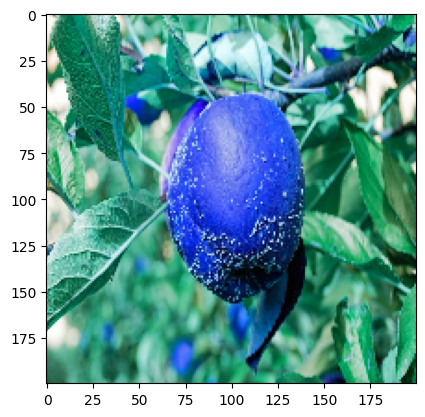

In [8]:
print(train_labels[5])
plt.imshow(train_images[5])

In [17]:
model = Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=32, activation='tanh', input_shape=(200,200,3,)))
model.add(Conv2D(filters=30, kernel_size=(3,3), activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30, kernel_size=(3,3), activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30, kernel_size=(3,3), activation='tanh'))

model.add(Flatten())

model.add(Dense(20, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(
    loss = 'categorical_crossentropy',
    metrics = ['acc'],
    optimizer = 'adam'
)

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 conv2d_9 (Conv2D)           (None, 196, 196, 30)      8670      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 98, 98, 30)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 96, 96, 30)        8130      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 48, 48, 30)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 46, 46, 30)       

In [19]:
history = model.fit(x_train, y_train, epochs=30, batch_size=50, validation_data=(x_val, y_val))

Epoch 1/30
4/4 [==============================] - 12s 3s/step - loss: 7.8433 - acc: 0.3611 - val_loss: 5.7157 - val_acc: 0.2500
Epoch 2/30
4/4 [==============================] - 10s 2s/step - loss: 3.4181 - acc: 0.2944 - val_loss: 1.7925 - val_acc: 0.4500
Epoch 3/30
4/4 [==============================] - 10s 3s/step - loss: 1.4550 - acc: 0.5111 - val_loss: 1.5717 - val_acc: 0.4333
Epoch 4/30
4/4 [==============================] - 11s 3s/step - loss: 1.2648 - acc: 0.5500 - val_loss: 1.4801 - val_acc: 0.5667
Epoch 5/30
4/4 [==============================] - 10s 2s/step - loss: 1.4442 - acc: 0.5500 - val_loss: 1.0385 - val_acc: 0.6167
Epoch 6/30
4/4 [==============================] - 10s 2s/step - loss: 1.1250 - acc: 0.5944 - val_loss: 1.1847 - val_acc: 0.6000
Epoch 7/30
4/4 [==============================] - 10s 2s/step - loss: 0.8616 - acc: 0.6222 - val_loss: 0.9521 - val_acc: 0.6000
Epoch 8/30
4/4 [==============================] - 10s 2s/step - loss: 0.6083 - acc: 0.7167 - val_loss: 0

In [20]:
# checkImage = test_images[0:1]
# checkLabel = test_labels[0:1]

# predict = model.predict(np.array(checkImage))

output = {0: 'apple', 1: 'banana', 2: 'mixed', 3:'orange'}

true = 0

for checkImage, checkLabel in zip(test_images, test_labels):
  predict = model.predict(np.array([checkImage]))
  predicted_label = output[np.argmax(predict)]
  print('Actual:- ', checkLabel)
  print("Predicted:-", predicted_label)
  if (checkLabel == predicted_label):
    true += 1
print('success ratio:', (true/len(test_labels)))

1/1 [==============================] - 0s 165ms/step
Actual:-  apple
Predicted:- apple
1/1 [==============================] - 0s 28ms/step
Actual:-  apple
Predicted:- apple
1/1 [==============================] - 0s 29ms/step
Actual:-  apple
Predicted:- apple
1/1 [==============================] - 0s 25ms/step
Actual:-  apple
Predicted:- apple
1/1 [==============================] - 0s 27ms/step
Actual:-  apple
Predicted:- apple
1/1 [==============================] - 0s 24ms/step
Actual:-  apple
Predicted:- apple
1/1 [==============================] - 0s 28ms/step
Actual:-  apple
Predicted:- apple
1/1 [==============================] - 0s 36ms/step
Actual:-  apple
Predicted:- apple
1/1 [==============================] - 0s 37ms/step
Actual:-  apple
Predicted:- apple
1/1 [==============================] - 0s 38ms/step
Actual:-  apple
Predicted:- banana
1/1 [==============================] - 0s 34ms/step
Actual:-  apple
Predicted:- apple
1/1 [==============================] - 0s 28ms/step
